### Team Members

### Anu Reddy - anu.reddy@stud.uni-heidelberg.de
### Keerthan Ugrani - keerthan.ugrani@stud.uni-heidelberg.de
### Florain Tichawa - florian.tichawa@stud.uni-heidelberg.de

1 Exploring the Data
Scikit-learn (usually abbreviated sklearn) provides a collection of standard datasets that are suitable for testing a classication algorithm (see https://scikit-learn.org/stable/datasets.html for a list of the available datasets and usage instructions). In this exercise, we want to recognize handwritten digits, which is a typical machine learning application. The dataset digits consists of 1797 small images with one digit per image.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Number of samples: 1797
Number of features: 64
Number of classes: 10


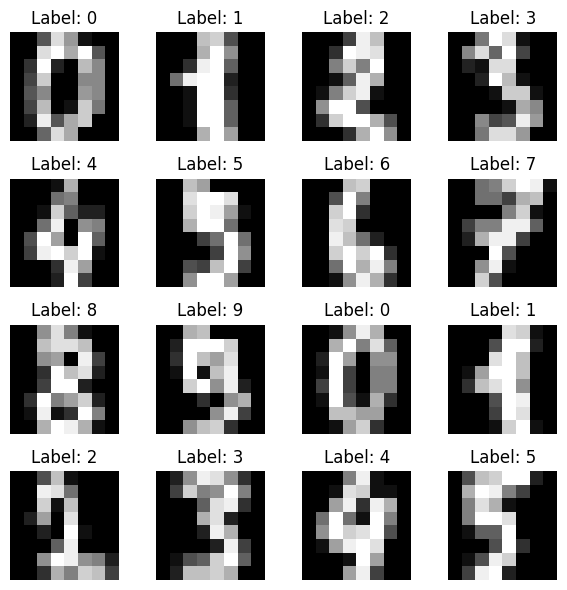

In [1]:
from sklearn.datasets import load_digits
from sklearn import model_selection
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.keys())
data = digits['data']
images = digits['images']
target = digits['target']
target_names=digits['target_names']
# Print some information about the dataset
print(f'Number of samples: {len(digits.data)}')
print(f'Number of features: {digits.data.shape[1]}')
print(f'Number of classes: {len(digits.target_names)}')

# Visualize some example digits
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [2]:
print(images[target==3][0])

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


Note that data is a attened (1-dimensional) version of images. What is the size of these images (the numpy attribute shape might come in handy)? Visualize one image of a 3 using the imshow function from matplotlib.pyplot, trying the two interpolation methods in the code:

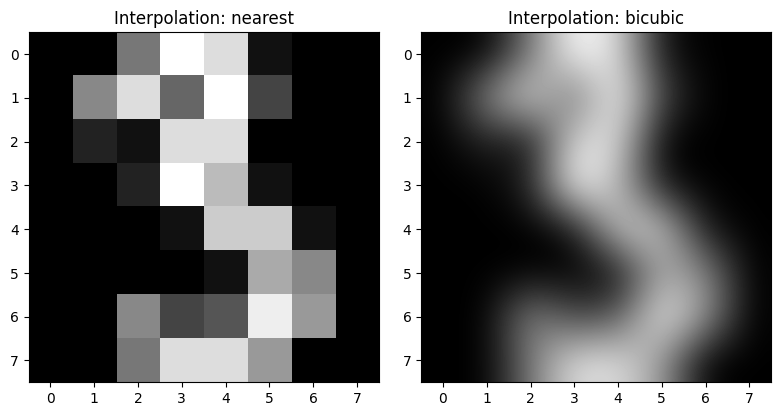

In [3]:
import numpy as np
import matplotlib.pyplot as plt
img = images[target==3][0]
assert 2 == len(img.shape)


#Display 
fig,axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(img,interpolation = 'nearest',cmap='gray')
axes[0].set_title(f'Interpolation: nearest')
axes[1].imshow(img,interpolation = 'bicubic',cmap='gray')
axes[1].set_title(f'Interpolation: bicubic')
plt.tight_layout()
plt.show()

We will only work with digits 3 and 9 to get a two-class problem. Please filter dataset such that only these two digits are left. Split this filtered dataset in a training and a test set (#train/#test = 3/2). Sklearn provides a convenient function to separate the data into a training and a test set:

In [4]:
# Filter the data such that it contains only 3 and 9 
filter_3_9 = np.logical_or(target==3,target==9)
data_3_9 = data[filter_3_9]
labels_3_9 = target[filter_3_9]

In [5]:
print(f'the train data {data_3_9.shape}')
print(f'the test data {labels_3_9.shape}')

the train data (363, 64)
the test data (363,)


After filtering out the data to just contain 3 and 9, the data falls to 363 values.

In [6]:
#Train-Test split 
X_train , X_test , y_train , y_test = model_selection.train_test_split(data_3_9, labels_3_9,
test_size = 0.4, random_state = 0)

In [7]:
print(f'the train data {X_train.shape}')
print(f'the test data {X_test.shape}')
print(y_train)
print(y_test)

the train data (217, 64)
the test data (146, 64)
[9 9 9 3 9 9 3 3 9 9 3 9 3 3 9 9 3 9 3 3 3 9 9 9 3 3 9 9 9 3 9 9 3 9 9 3 3
 3 3 3 9 3 9 9 9 9 9 9 9 9 3 9 9 9 9 3 3 9 9 3 9 3 3 9 3 3 9 3 3 9 3 9 3 3
 9 3 9 9 3 9 3 3 9 3 3 9 3 3 9 9 3 9 3 9 9 9 9 3 3 3 3 3 3 3 3 9 3 3 3 9 9
 9 9 9 3 9 9 9 3 9 3 9 9 3 3 9 3 3 9 9 3 9 3 9 3 3 9 9 9 9 3 3 9 9 3 9 3 3
 9 3 3 3 3 3 9 9 9 9 9 3 3 9 3 9 3 3 3 9 9 3 9 9 3 3 3 9 9 9 9 9 9 3 3 3 9
 3 3 9 3 3 9 3 9 9 3 3 3 3 3 3 3 9 3 9 3 9 9 3 9 3 3 3 3 3 3 3 3]
[9 9 9 3 3 9 3 9 3 9 3 3 9 3 9 3 3 9 9 9 3 9 3 3 3 3 3 9 9 3 9 9 9 3 9 9 9
 3 3 3 3 9 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 3 3 9 9 9 3 3 9 9 3 9 3 9 3 3 3 3
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 3 9 3 9 9 9 9 3 9 3 3 3 3 9 9 3 3 3 9 3
 9 9 9 3 3 3 9 9 9 9 9 3 3 9 3 3 9 3 9 9 9 9 9 9 9 9 9 3 3 9 3 3 3 9 9]


We have divided into train and test data and as we check the labels in the test it contains only 3 and 9.

### comments:(as per the reference solution provided)
    1. While visualising the digits, this code visualises in 2 interpolation methods while the sammple solution has done 3 methods.
    2.The data should have been normlaised by dividing it by the maximum values in the data (good practice)
    3.Same Liberaries are used in every cell, please print all at the beginnning.
    4.Its also beneficial to add error handling(optional) for checking the input.

### 2.1 Feature construction
To facilitate visualization, you should construct a 2-dimensional feature space with any formula over the 64 original pixels you can come up with. You may, for example, choose two pixels that seem to have a big inuence for the distinction between 3's and 9's. To identify suitable pixels, you may want to look at the average images for the two classes  pixels that tend to be bright in one class and dark in the other are good candidates. You can also use some clever linear or non-linear combination of multiple pixels into 2 features, for example: f ̃ = 0.3f + 42 f13 and f ̃ = f − f . 1 23 f64 2 33 62 Of course, the quality of your features determines the achievable error and therefore is a limiting factor for the quality of your predictions. Your dimension reduction procedure should be callable through a function features2d: features = features2d(x) where x is a #instances × 64 matrix and features has shape #instances × 2.

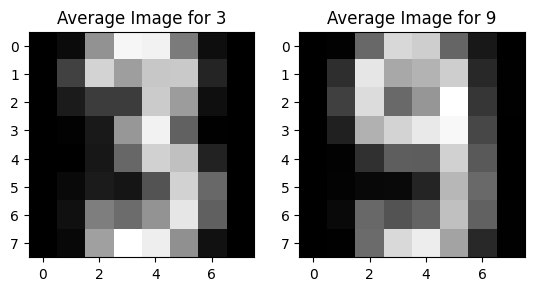

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the average image for class 3
class3 = np.mean(X_train[y_train==3], axis=0).reshape(8,8)

# Compute the average image for class 9
class9 = np.mean(X_train[y_train==9], axis=0).reshape(8,8)

# Plot the average images for visual inspection
plt.subplot(1, 2, 1)
plt.imshow(class3, cmap='gray')
plt.title('Average Image for 3')

plt.subplot(1, 2, 2)
plt.imshow(class9, cmap='gray')
plt.title('Average Image for 9')

plt.show()

Using various methods before deciding the best method to extract 2 features(using linear and non-linear functions)

### Method 1: using PCA to extract the 2 features

In [9]:
from sklearn.decomposition import PCA
def features2d(x):    
    # Identify a set of pixels that are likely to be informative for distinguishing between the two classes
    # Here, we use the first two principal components of the data as the selected features
    pca = PCA(n_components=2)
    features = pca.fit_transform(x)
    
    return features


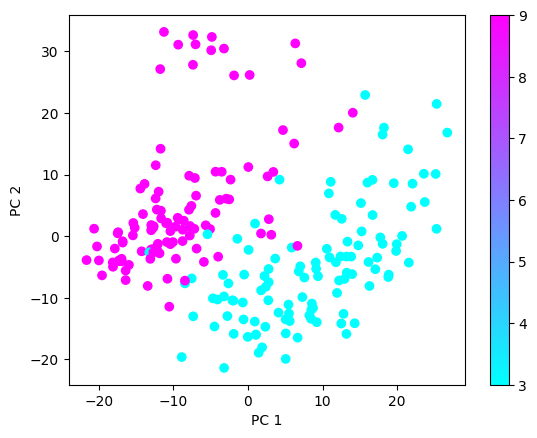

In [10]:
# Compute the 2-dimensional feature space for the subset
features_subset_train = features2d(X_train)

# Create a scatter plot of the feature space
plt.scatter(features_subset_train[:, 0], features_subset_train[:, 1], c=y_train, cmap='cool')
plt.colorbar()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The scatter plot contains only labels of 3 (blue) and pink for label 9. There seems to be a differential cluster formed for class 3 and class 9, we can draw a linear line to seperate the 2 classes(some points there is a mix)

### Method 2: using the non-linear combination to multiple the pixels to get the 2 features

$$ \widetilde {f1} = 0.3f{23}+42\frac{f{13}}{f{64}} and \widetilde {f2} = f{33}-f_{62}$$ 

In [11]:
def features2d(x):
    '''This is a Python function features2d(x) that takes a 2D array x as input and 
    returns a modified 2D array of features that represents the original data in a 2D space.
    input:2d array train data containing 3 and 9 class
    output:2d array of features of classes '''
    # Extract the pixel intensities for the selected positions
    pix_23 = x[:, 23]
    pix_13 = x[:, 13]
    pix_63 = x[:, 63]
    pix_33 = x[:, 33]
    pix_62 = x[:, 62]
    
    # Compute the features using the specified formula (given in the qns)
    eps = 1e-10 # to avoid divide by zero 
    f1 = 0.3 * pix_23 + 42 * pix_13 / (pix_63 + eps)
    f2 = pix_33 - pix_62
    
    # Stack the features into a 2D array in order to maintain the same rows as the input 'x'
    features = np.column_stack((f1, f2))
    
    return features

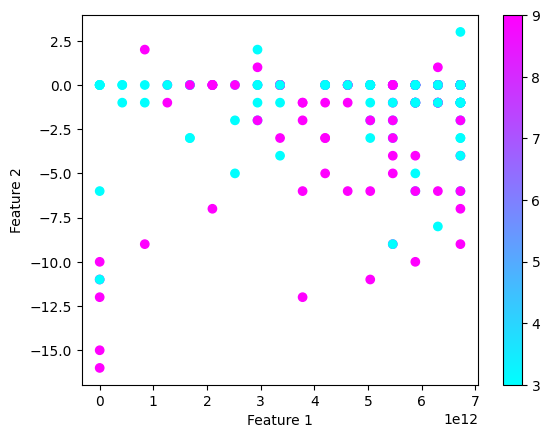

In [12]:
# Compute the 2-dimensional feature space for the subset
features_subset_train = features2d(X_train)

# Create a scatter plot of the feature space
plt.scatter(features_subset_train[:, 0], features_subset_train[:, 1], c=y_train, cmap='cool')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Using the non-linear method provided by we may not be able to distinguish btw 2 classes (3 and 9) as PCA did.

### Method 3: Using simple linear combination

In [13]:
# Compute the average images for the two classes
mean_3 = np.mean(X_train[y_train == 3], axis=0)
mean_9 = np.mean(X_train[y_train == 9], axis=0)

# Find the pixels that are bright in one class and dark in the other
diff = mean_3 - mean_9
bright_pixels = np.where(diff > 0)[0]
dark_pixels = np.where(diff < 0)[0]

In [14]:
def features2d(x):
    # Compute the two-dimensional feature space using a linear combination of pixels
    f1 = np.dot(x[:, bright_pixels], np.ones(len(bright_pixels)))
    f2 = np.dot(x[:, dark_pixels], np.ones(len(dark_pixels)))
    features = np.stack([f1, f2], axis=1)
    return features

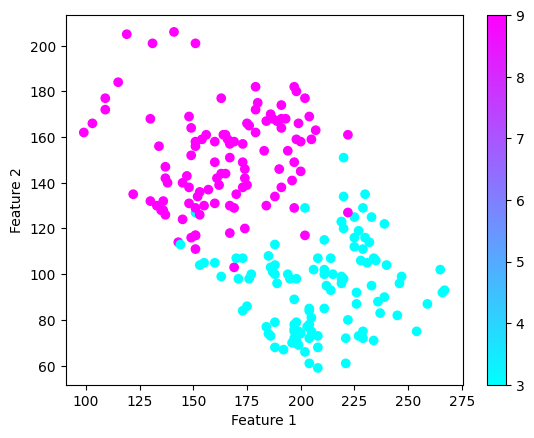

In [15]:
# Compute the 2-dimensional feature space for the subset
features_subset_train = features2d(X_train)

# Create a scatter plot of the feature space
plt.scatter(features_subset_train[:, 0], features_subset_train[:, 1], c=y_train, cmap='cool')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

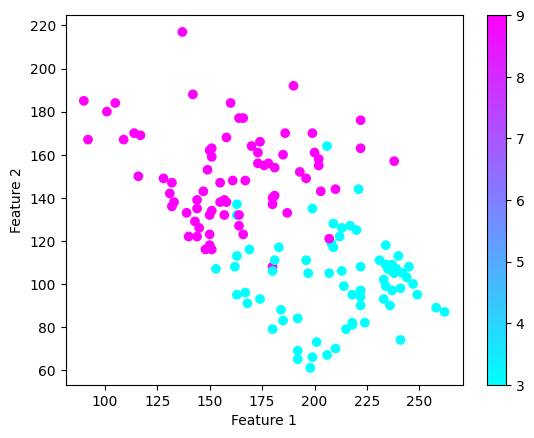

In [16]:
# test data 
# Compute the 2-dimensional feature space for the subset
features_subset_test = features2d(X_test)

# Create a scatter plot of the feature space
plt.scatter(features_subset_test[:, 0], features_subset_test[:, 1], c=y_test, cmap='cool')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Using the simple linear combination of pixels we are able to linearly(almost) seperate the 2 classes as requested.Hence, based on the above observations, linear and PCA does a better job of segregating this dataset into 2 classes.

### comments:(Using the sample code as reference):
    1. The above code  has the advantage of providing multiple versions of the features2d function, demonstrating different approaches to feature construction.
    2. The  code takes into account potential division by zero in its feature computation, which shows good awareness of potential sources of error.
    3.It might be helpful to include some evaluation of how well each method of feature construction works, such as by training a simple classifier on the features and reporting its accuracy.

### 2.3 Decision rule
First define a very simple decision rule: Find the mean of the 2D feature vectors of each class in the training set and assign each test instance to the label of the nearest mean. The decision boundary of this method is the bisector between the two means. The signature of the function is supposed to look like this: predicted_labels = nearest_mean(training_features, training_labels, test_features) where training_features and test_features are the outputs of features2d() for training and test data respectively. Compute and report the training and test errors of the classifier (i.e. the
F
P
+
F
N
N
on the respective dataset). If your features are very informative, this classier may already have good performance. Otherwise, you can define a more sophisticated decision boundary by picking good β and b in the formula yb = sign(x · β + b). If this is still not satisfactory, improve your features. Again compute and report ii the test error of your formula.

In [17]:
def nearest_mean(training_features, training_labels, test_features):
    '''The nearest_mean function is an implementation of a simple nearest mean classifier for a two-class problem, specifically for classes with labels 3 and 9. 
    input: array of training and testing features and labels 
    output: array of predicted labels'''
    
    # Compute the class means for the training features
    mean_3 = np.mean(training_features[training_labels == 3], axis=0)
    mean_9 = np.mean(training_features[training_labels == 9], axis=0)

    # Compute the bisector between the two class means
    bisector = (mean_3 + mean_9) / 2

    # Predict the class label for each test instance based on the nearest mean
    distances_3 = np.linalg.norm(test_features - mean_3, axis=1)
    distances_9 = np.linalg.norm(test_features - mean_9, axis=1)
    predicted_labels = np.where(distances_3 < distances_9, 3, 9)

    return predicted_labels

In [18]:
from sklearn.metrics import confusion_matrix
# Compute the 2-dimensional feature space for the training and test sets
train_features = features2d(X_train)
test_features = features2d(X_test)

# Compute the predicted labels for the training and test sets
train_predicted_labels = nearest_mean(train_features, y_train, train_features) # used the same train_features as test set here 
test_predicted_labels = nearest_mean(train_features, y_train, test_features)

# Compute the training and test error
train_error = np.mean(train_predicted_labels != y_train)
test_error = np.mean(test_predicted_labels != y_test)

print(f'Training error: {train_error:.2f}')
print(f'Test error: {test_error:.2f}')

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test, test_predicted_labels)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

Training error: 0.05
Test error: 0.08
Confusion matrix:
[[64  8]
 [ 3 71]]


To define a more sophisticated decision boundary, you can use a linear classifier such as logistic regression or support vector machine (SVM). These classifiers learn a decision boundary that separates the two classes by maximizing the margin or likelihood.

For logistic regression, the decision boundary is defined as the hyperplane x · β + b = 0, where β is the weight vector and b is the bias term. The logistic function is then applied to the output to obtain the probability of each class.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract 2D features
X_train = features2d(X_train)
X_test = features2d(X_test)

# Train logistic regression classifier
lr = LogisticRegression(random_state=0,C=0.1,solver='lbfgs')
lr.fit(X_train, y_train)
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)
train_error_lr = 1 - accuracy_score(y_train, train_pred_lr)
test_error_lr = 1 - accuracy_score(y_test, test_pred_lr)


# Print errors
print("Logistic Regression:")
print("Training error:", train_error_lr)
print("Test error:", test_error_lr)

Logistic Regression:
Training error: 0.027649769585253448
Test error: 0.06164383561643838


- From both the well-known methods, its shows that training error shows a slight diff when using user-defined (nearest mean) and by using logistic regression of 0.02% (can be negligible).
- The test error looks similar in both the methods of decision rule.

### comments( Referring the sample code )
    1.The code is lacking in flexible as its well only for 2 class(as per the task) but sample code provided works for the multi-class problem as well.
    2.Implemented the confusion matrix which provides more details infomation about the perfomance of the classifier.
    3.The above code uses the logistic regression which automatically finds the optimal parameters but the sample code uses the linear classifier which manually takes the parameters.
    4.Functions needs to be more organisied and modular as the sample code.

### 2.4 Visualize the decision regions
An image of the decision regions can be quite helpful for analyzing classifier performance. The simplest way to do this is to create a grid (i.e. an image) where each pixel position represents a feature coordinate, and the pixel is colored with the corresponding predicted class label. Since you created the features on your own, you must find a sensible transformation (i.e translation and scaling) from feature coordinates to grid coordinates so that your image covers the interesting part of the feature domain. A 200×200 grid provides sufficient resolution. Plot this image to visualize the decision regions. Overlay the plot with two markers for the two class means and with a scatterplot of the test data, marked according to their ground truth labels as in task 2.2. Consult the matplotlib documentation to find out how several layers of information can be overlayed in the same plot. Plot the decision boundary of the two models from the previous subtask.

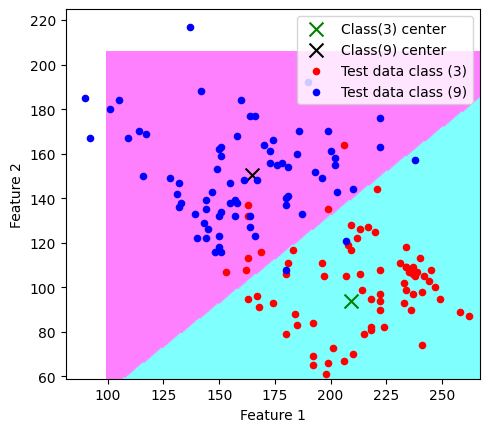

In [20]:
# Compute the class means for the training features
mean_3 = np.mean(train_features[y_train == 3], axis=0)
mean_9 = np.mean(train_features[y_train == 9], axis=0)

# Compute the grid coordinates
min_x, max_x = np.min(train_features[:, 0]), np.max(train_features[:, 0])
min_y, max_y = np.min(train_features[:, 1]), np.max(train_features[:, 1])
grid_x, grid_y = np.meshgrid(np.linspace(min_x, max_x, 200), np.linspace(min_y, max_y, 200))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)

# Compute the predicted class labels for the grid points
grid_predicted_labels = nearest_mean(train_features, y_train, grid_points)

# Reshape the predicted labels to a 2D image
grid_image = grid_predicted_labels.reshape(grid_x.shape)

# Plot the decision regions and overlay with markers and scatter plot
plt.imshow(grid_image, extent=[min_x, max_x, min_y, max_y], origin='lower', cmap='cool', alpha=0.5)
plt.scatter(mean_3[0], mean_3[1], marker='x', s=100, color='green', label='Class(3) center')
plt.scatter(mean_9[0], mean_9[1], marker='x', s=100, color='black', label='Class(9) center')
plt.scatter(test_features[y_test == 3, 0], test_features[y_test == 3, 1], marker='o', s=20, color='red', label='Test data class (3)')
plt.scatter(test_features[y_test == 9, 0], test_features[y_test == 9, 1], marker='o', s=20, color='blue', label='Test data class (9)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### comments (Using the sample code as reference):
    1.The sample code provided defines functions (visualization_NearestMean and visualization_SimpleLinearClassifier) to visualize the decision regions, making the code more reusable and modular, but the above code lacks reusablility.
    2.The data visualization has been done on train and test data but only training data has been visualised and testing data has been missed.
    3.Better adjust the alpha value so that overraid points also are visible.
    4.This code would probably work for 2 class only but not for multi-class classifiers (as the sample code does.)

### 3.1 Implement LDA training
Implement the function: mu, covmat, p = fit_lda(training_features, training_labels) that accepts a N × D matrix training_features and a N-dimensional vector training_labels, where N is the total number of training instances used. Your code should work for arbitrary values of D, so that we can apply it to your features from task 2 as well as to the full vector of 64 pixels. Recall that the features xj are the rows of matrix training_features. The label vector should use label -1 to indicate digit 3 and label 1 to indicate digit 9. Use the algorithm that ts the cluster means and covariance matrix as explained in the lecture: The output of fit_lda should be the 2 × D matrix mu whose rows are the two class means, the D × D matrix covmat containing the covariance and the vector p containing the two priors. Apply the t function to your feature data from task 2 and to the full pixel vector

In [21]:

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [22]:
digits = load_digits()

print(digits.keys())
# Image data
# print(digits["data"])
# Labels
# print(digits["target"])

digits_39 = [c if c in [3, 9] else -1 for c in digits["target"]]

filtered_data = np.array([digit for index, digit in enumerate(digits["data"]) if digits_39[index] > -1])
filtered_labels = np.array([label for index, label in enumerate(digits["target"]) if digits_39[index] > -1])

data_train, data_test, labels_train, labels_test = train_test_split(filtered_data, filtered_labels, random_state=42)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [23]:
# Compute the average images for the two classes
mean_3 = np.mean(data_train[labels_train == 3], axis=0)
mean_9 = np.mean(data_train[labels_train == 9], axis=0)

# Find the pixels that are bright in one class and dark in the other
diff = mean_3 - mean_9
bright_pixels = np.where(diff > 0)[0]
dark_pixels = np.where(diff < 0)[0]

def features2d(x):
    # Compute the two-dimensional feature space using a linear combination of pixels
    f1 = np.dot(x[:, bright_pixels], np.ones(len(bright_pixels)))
    f2 = np.dot(x[:, dark_pixels], np.ones(len(dark_pixels)))
    features = np.stack([f1, f2], axis=1)
    return features

data_train = features2d(data_train)
data_test = features2d(data_test)

In [24]:
# The calculation of the priors and means as coded here support more than two classes without any adjustments.
# It would not have been much easier to only support two-class cases, so I decided to go with this version instead.
# The covariance matrix is only implemented for the two-class though.
def fit_lda(training_features, training_labels):
    feature_count = len(training_features[0])

    labels, counts = np.unique(training_labels, return_counts=True)
    p = counts / len(training_labels)

    mu = np.empty((len(labels), feature_count))
    for label_index, curr_label in enumerate(labels):
        where = [feature_count * [training_label == curr_label] for training_label in training_labels]
        mu[label_index] = np.sum(training_features, axis=0, where=where) / counts[label_index]

    # From here on, we assume no more than two classes.
    features_c1 = [data for index, data in enumerate(training_features) if training_labels[index] == labels[0]]
    features_c2 = [data for index, data in enumerate(training_features) if training_labels[index] == labels[1]]

    c1_sums = np.zeros((feature_count, feature_count))
    for training_instance in features_c1:
        training_instance -= mu[0]
        c1_sums += np.outer(training_instance, training_instance)

    c2_sums = np.zeros((feature_count, feature_count))
    for training_instance in features_c2:
        training_instance -= mu[1]
        c2_sums += np.outer(training_instance, training_instance)

    covmat = (c1_sums + c2_sums) / len(training_features)

    return mu, covmat, p

In [25]:
def fit_lda(training_features, training_labels, reg=1e-6):
    feature_count = len(training_features[0])

    labels, counts = np.unique(training_labels, return_counts=True)
    p = counts / len(training_labels)

    mu = np.empty((len(labels), feature_count))
    for label_index, curr_label in enumerate(labels):
        where = [feature_count * [training_label == curr_label] for training_label in training_labels]
        mu[label_index] = np.sum(training_features, axis=0, where=where) / counts[label_index]

    # From here on, we assume no more than two classes.
    features_c1 = [data for index, data in enumerate(training_features) if training_labels[index] == labels[0]]
    features_c2 = [data for index, data in enumerate(training_features) if training_labels[index] == labels[1]]

    c1_sums = np.zeros((feature_count, feature_count))
    for training_instance in features_c1:
        training_instance -= mu[0]
        c1_sums += np.outer(training_instance, training_instance)

    c2_sums = np.zeros((feature_count, feature_count))
    for training_instance in features_c2:
        training_instance -= mu[1]
        c2_sums += np.outer(training_instance, training_instance)

    covmat = (c1_sums + c2_sums) / len(training_features) + reg * np.eye(feature_count)

    return mu, covmat, p

Generated covariance map:


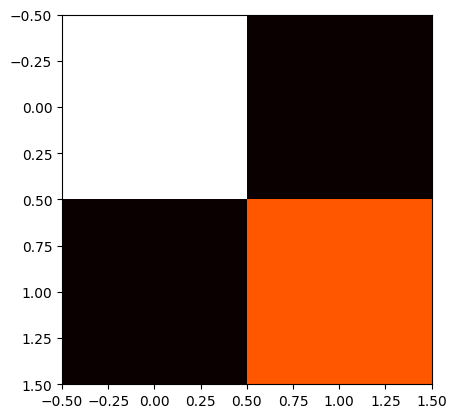

[[878.8500018  -72.3951808 ]
 [-72.3951808  399.24188014]]
NumPy covariance map:


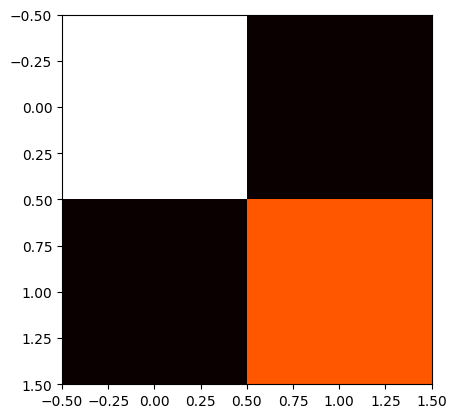

[[882.09298973 -72.66232169]
 [-72.66232169 400.7150964 ]]


In [26]:
mu, covmat, p = fit_lda(data_train, labels_train)

print("Generated covariance map:")
plt.imshow(covmat, cmap='hot', interpolation='nearest')
plt.show()
print(covmat)
print("NumPy covariance map:")
plt.imshow(np.cov(data_train.T), cmap='hot', interpolation='nearest')
plt.show()
print(np.cov(data_train.T))

In [27]:
def predict_lda(mu, covmat, p, test_features):
    covmat_inv = np.linalg.inv(covmat)
    beta = covmat_inv @ (mu[0] - mu[1])
    b = -0.5 * ((mu[0] - mu[1]) @ beta) + np.log(p[0] / p[1])

    return np.sign((test_features @ beta) + b)


In [28]:
predicted_labels = predict_lda(mu, covmat, p, data_test)
print([3 if x > 0 else 9 for x in predicted_labels])

index = random.randint(0, len(labels_test))
print("\nChoosing random index...",
      "\nChose index", index,
      "\nPredicted label:", 3 if predicted_labels[index] > 0 else 9,
      "\nActual label:", labels_test[index],
      "\nInput data:")
# plt.imshow(data_test[index].reshape((8, 8)), cmap="binary", interpolation='nearest')
plt.show()

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Choosing random index... 
Chose index 4 
Predicted label: 9 
Actual label: 9 
Input data:


In [29]:
def calc_confusion_matrix(fitter, predictor, data_train, labels_train, data_test, labels_test):
    mu, covmat, p = fitter(data_train, labels_train)
    predicted_labels = predictor(mu, covmat, p, data_test)

    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for index, label in enumerate([3 if x > 0 else 9 for x in predicted_labels]):
        if label == labels_test[index]:
            if label == 3:
                tp += 1
            else:
                tn += 1
        else:
            if label == 3:
                fp += 1
            else:
                fn += 1
    
    return ((tp, fp), (fn, tn))

[-8.12048841e-15  6.09036631e-15]
[8.61263922e-15 4.30631961e-15]


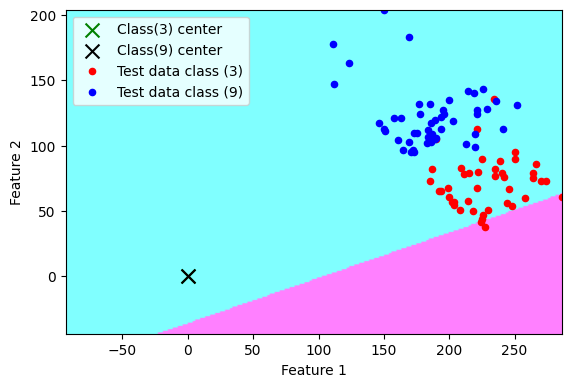

In [30]:
# Compute the class means for the training features
mean_3 = np.mean(data_train[labels_train == 3], axis=0)
print(mean_3)
mean_9 = np.mean(data_train[labels_train == 9], axis=0)
print(mean_9)

# Compute the grid coordinates
scale = 1
min_x, max_x = scale * min(np.min(data_test[:, 0]), np.min(data_train[:, 0])), scale * max(np.max(data_test[:, 0]), np.max(data_train[:, 0]))
min_y, max_y = scale * min(np.min(data_test[:, 1]), np.min(data_train[:, 1])), scale * max(np.max(data_test[:, 1]), np.max(data_train[:, 1]))
grid_x, grid_y = np.meshgrid(np.linspace(min_x, max_x, 200), np.linspace(min_y, max_y, 200))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)

# Compute the predicted class labels for the grid points

grid_predicted_labels = predict_lda(mu, covmat, p, grid_points)

# Reshape the predicted labels to a 2D image
grid_image = grid_predicted_labels.reshape(grid_x.shape)

# Plot the decision regions and overlay with markers and scatter plot
plt.imshow(grid_image, extent=[min_x, max_x, min_y, max_y], origin='lower', cmap='cool', alpha=0.5)
plt.scatter(mean_3[0], mean_3[1], marker='x', s=100, color='green', label='Class(3) center')
plt.scatter(mean_9[0], mean_9[1], marker='x', s=100, color='black', label='Class(9) center')
plt.scatter(data_test[labels_test == 3, 0], data_test[labels_test == 3, 1], marker='o', s=20, color='red', label='Test data class (3)')
plt.scatter(data_test[labels_test == 9, 0], data_test[labels_test == 9, 1], marker='o', s=20, color='blue', label='Test data class (9)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Combined confusion matrix:
[[0.02754821 0.        ]
 [0.47658402 0.49586777]]


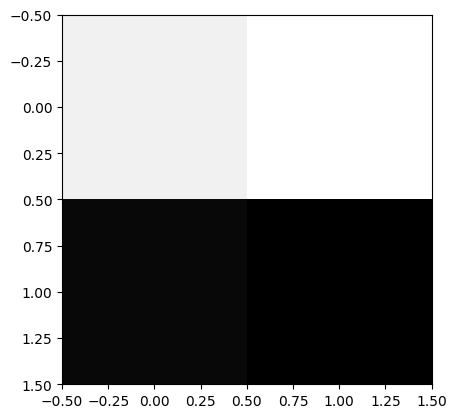

In [31]:
folds = KFold(n_splits=10)
matrices = list()
for i, (indices_train, indices_test) in enumerate(folds.split(filtered_data)):
    data_train = filtered_data[indices_train]
    labels_train = filtered_labels[indices_train]
    data_test = filtered_data[indices_test]
    labels_test = filtered_labels[indices_test]
    matrices.append(calc_confusion_matrix(fit_lda, predict_lda, data_train, labels_train, data_test, labels_test))

matrices = np.sum(matrices, axis=0) / np.sum(matrices)
print("Combined confusion matrix:")
print(matrices)
plt.imshow(matrices, cmap="binary", interpolation="nearest")
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
data_train = lda.fit_transform(data_train, labels_train)
data_test = lda.transform(data_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(data_train, labels_train)
y_pred = classifier.predict(data_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(labels_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(labels_test, y_pred)))

[[ 4 14]
 [ 6 12]]
Accuracy0.4444444444444444


### 4 SVM

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [37]:
data_train, data_test, labels_train, labels_test = train_test_split(filtered_data, filtered_labels, random_state=42)

In [38]:
model_linear = SVC(kernel='linear')
model_linear.fit(data_train, labels_train)

# predict
y_pred = model_linear.predict(data_test)

In [39]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=labels_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=labels_test, y_pred=y_pred))

accuracy: 0.967032967032967 

[[43  0]
 [ 3 45]]


In [40]:
class SVM:
    #initializing the parameters and helper function to initialize the weights and biases
    
    def __init__(self, learning_rate=1e-3, lambda_param=np.random.normal(), n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
        
    # class mapping of (0,1) to (-1,1) to get fit in the hyperplane

    def _get_class_map(self, y):
        return np.where(y <= 0, -1, 1)

    #using gradient descent for optimization of parameters accordingly
    
    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.class_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.class_map[idx], x)
        db = - self.class_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.class_map = self._get_class_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    # prediction
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)